In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [159]:
def plot_loss_and_acc(loss, acc, title,runtype, log = False, ax1 = None):

  if ax1 is None:
    fig, ax1 = plt.subplots()

  # print(loss.shape,acc.shape)

  b, g = "royalblue", "seagreen"
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss', color = b)
  # ax1.plot(loss, label = "Loss", color = b)
  ax1.fill_between([i for i in range(len(loss[0]))], np.min(loss,axis = 0), np.max(loss,axis = 0), color = b, alpha = 0.6)
  ax1.tick_params(axis='y')
  ax1.set_ylim(0,np.max(loss))
  ax1.plot(np.mean(loss,axis = 0), '--', color = b)
  if log:
    ax1.set_xscale("log")

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x--axis

  ax2.set_ylabel('Validation accuracy', color = g)
  # ax2.plot(acc, label = "Accuracy", color = g)
  ax2.fill_between([i for i in range(len(acc[0]))], np.min(acc,axis = 0), np.max(acc,axis = 0), color = g, alpha = 0.6)
  ax2.set_ylim(0.5,1)
  ax2.plot(np.mean(acc,axis = 0), '--', color = g)
  ax2.tick_params(axis='y')

  ax1.set_title(title)
  # fig.tight_layout()  # otherwise the right y-label is slightly clipped
  # fig.legend(loc = 0)
  
#   plt.savefig(pth+runtype+str(len(acc[0]))+"epochs.png")
  # plt.show()


In [207]:
def plot_mult(loss, acc, title,runtype, log = False, ax1 = None, text = ""):

  if ax1 is None:
    fig, ax1 = plt.subplots()

  # print(loss.shape,acc.shape)

  b, g = "royalblue", "seagreen"
#   ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss', color = b)
#   # ax1.plot(loss, label = "Loss", color = b)
  ax1.fill_between([i for i in range(len(loss[0]))], np.min(loss,axis = 0), np.max(loss,axis = 0), color = b, alpha = 0.6)
#   ax1.tick_params(axis='y')
  ax1.set_ylim(0,np.max(loss))
  ax1.plot(np.mean(loss,axis = 0), '--', color = b)
  if log:
    ax1.set_xscale("log")

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x--axis

  ax2.set_ylabel('Validation accuracy', color = g)
  # ax2.plot(acc, label = "Accuracy", color = g)
  ax2.fill_between([i for i in range(len(acc[0]))], np.min(acc,axis = 0), np.max(acc,axis = 0), color = g, alpha = 0.6)
  ax2.plot(np.mean(acc,axis = 0), '--', color = g)
#   ax2.tick_params(axis='y')

  ax1.set_title(title)

  # ax2.set_ylim(0.5,1)
  # ax1.get_shared_y_axes().join(ax1,ax2)

  ax1.text(np.log(len(loss[0])),0.05, text)

  return ax2
  # fig.tight_layout()  # otherwise the right y-label is slightly clipped
  # fig.legend(loc = 0)
  
#   plt.savefig(pth+runtype+str(len(acc[0]))+"epochs.png")
  # plt.show()

(1, 600)

(3, 600) (3, 600)
(3, 600) (3, 600)
(1, 600) (1, 600)


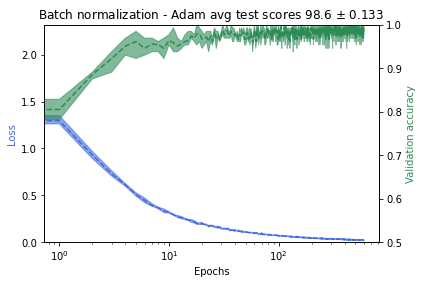

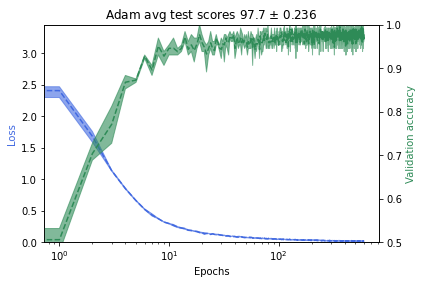

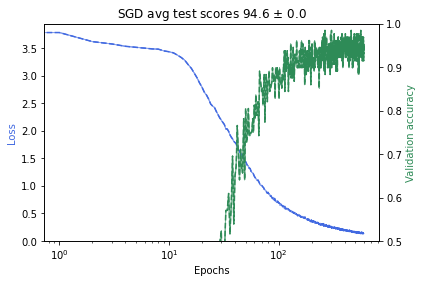

In [156]:
loss = np.genfromtxt("Runs/all lossesBatch normalization - ADAM200epochs-0.01LR.csv",delimiter = ",")
acc = np.genfromtxt("Runs/all accuraciesBatch normalization - ADAM200epochs-0.01LR.csv",delimiter = ",")
test =  np.genfromtxt("Runs/all final_accuraciesBatch normalization - ADAM200epochs-0.01LR.csv",delimiter = ",")

plot_loss_and_acc(loss,acc,"Batch normalization - Adam" + f" avg test scores {np.mean(test):.3} $\pm$ {np.std(test):.3}","",True)


loss = np.genfromtxt("Runs/all lossesNormal - ADAM200epochs-0.01LR.csv",delimiter = ",")
acc = np.genfromtxt("Runs/all accuraciesNormal - ADAM200epochs01LR.csv",delimiter = ",").reshape((3,600))
test = np.genfromtxt("Runs/all final_accuraciesNormal - ADAM200epochs-0.01LR.csv",delimiter = ",")

plot_loss_and_acc(loss,acc,"Adam" + f" avg test scores {np.mean(test):.3} $\pm$ {np.std(test):.3}","",True)


loss = np.genfromtxt("Runs/all lossesNormal - SGD200epochs.csv",delimiter = ",")
acc = np.genfromtxt("Runs/all accuraciesNormal - SGD200epochs.csv",delimiter = ",")
test = np.genfromtxt("Runs/all final_accuraciesNormal - SGD200epochs.csv",delimiter = ",")

acc = np.expand_dims(acc,0)
loss = np.expand_dims(loss,0)
# acc.shape

plot_loss_and_acc(loss,acc,"SGD" + f" avg test scores {np.mean(test):.3} $\pm$ {np.std(test):.3}","",True)


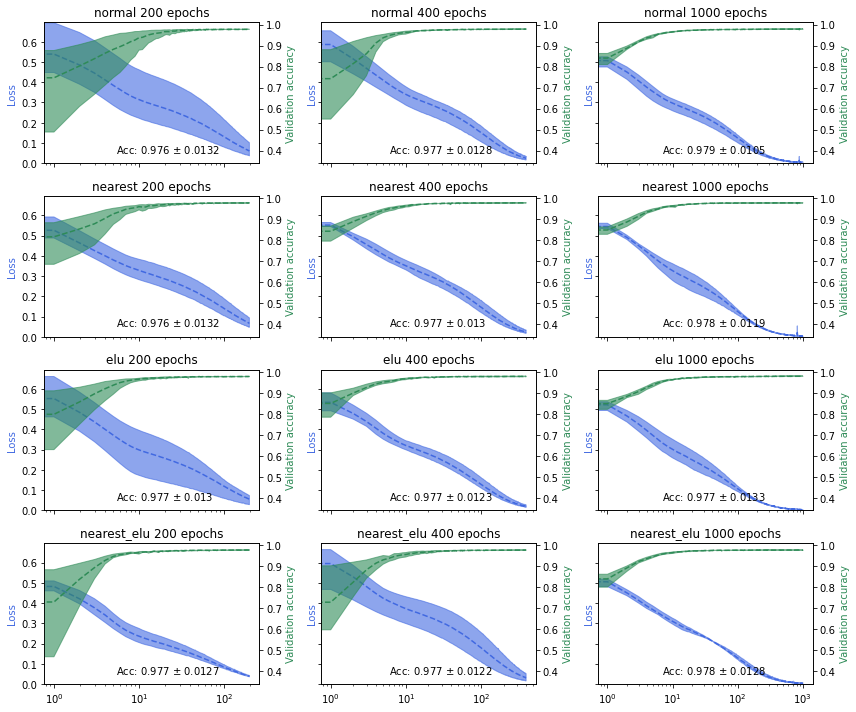

In [208]:


fig, axs = plt.subplots(4,3, figsize = (12,10), sharey=True, sharex= "col")

axs = axs.flatten()

i_plot = 0


lasty = None
for type in xray.keys():
    for n_epochs in ["200", "400", "1000"]:
        xray = np.load("Runs/xray_runs"+n_epochs+"epochs.npy",allow_pickle = True).item()

        loss = []
        acc = []
        for i in range(3):
            r = np.array(xray[type]["train_history"][i]["loss"])
            a = np.array(xray[type]['val_history'][i]['f1'])

            loss.append(r)
            acc.append(a)
        loss = np.array(loss)
        acc = np.array(acc)


        test = xray[type]["test_scores"]

        ax2 = plot_mult(loss,acc,type + " " + n_epochs + " epochs" ,"",True, ax1 = axs[i_plot], text = f"Acc: {np.mean(test):.3} $\pm$ {np.std(test):.3}") #+ f" - {n_epochs} epochs - avg test scores {np.mean(test):.3} $\pm$ {np.std(test):.3}"
        
        if not lasty is None:
            ax2.get_shared_y_axes().join(ax2,lasty)

        lasty = ax2
        i_plot += 1

        

fig.tight_layout()

<AxesSubplot:title={'center':'nearest_elu - 1000 epochs - avg test scores 0.978 $\\pm$ 0.0128'}, xlabel='Epochs', ylabel='Loss'>